# Proyecto 1. Pandas
Con el fichero Fichero `sample_NYC_parking_issues.csv`


**Importante:** los cambios se arrastran en las siguientes preguntas.


### Crea un proyecto en Github para esta entrega e incluye un fichero Readme.md
Asegurate que es público ya que solo se puede entregar la URL del proyecto en github.
<hr/>

### A) Limpia el dataframe de aquellas columnas con todos sus campos a NAN

In [9]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("sample_NYC_parking_issues.csv", delimiter=";",on_bad_lines="skip")
df_cleaned = df.fillna(0)

### B) Elimina todas las muestras donde la fecha no tenga coherencia: `Vehicle Year`, además transformalas a enteros (2024,2012,2006,etc.)

In [ ]:
df_cleaned['Vehicle Year'] = df_cleaned['Vehicle Year'].astype(int)
df_filtered = df_cleaned[(df_cleaned['Vehicle Year'] > 0) & (df_cleaned['Vehicle Year'] <= datetime.now().year)]

### C) Hay marcas de vehículos que no guardan sentido con ninguna marca real (`Vehicle Make`) elimina dichas muestras. Deja constancia de cuantas has borrado.

In [152]:
makes_counts = df_filtered['Vehicle Make'].value_counts()
makes_to_drop = makes_counts[makes_counts < 10].index
df_filtered_makes = df_filtered[~df_filtered['Vehicle Make'].isin(makes_to_drop)]
df_filtered_makes = df_filtered_makes[(df_filtered_makes['Vehicle Make'].str.len() > 1)]
print("Se han borrado %s marcas" % len(makes_to_drop.values))

Se han borrado 58 marcas


### D) Representa en un grafíco de barras la cantidad de vehículos (por marca `Vehicle Make`) 

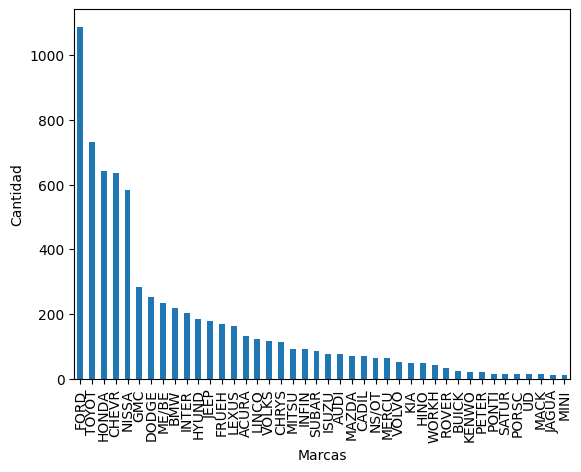

In [153]:
import matplotlib.pyplot as plt

df_makes_count = df_filtered_makes['Vehicle Make'].value_counts()
df_makes_count.plot(kind="bar",xlabel="Marcas", ylabel="Cantidad")

plt.show()


### E) Unifica lo máximo que puedas la terminología de colores. Por ejemplo, valores como `WH` y `wh`y `wh\`hacen referencia al `white`

In [176]:
std_colors = {"0": "BLACK",
              "W": "WHITE",
              "WH": "WHITE",
              "WHI": "WHITE",
              "WHIT": "WHITE",
              "WTH": "WHITE",
              "BK": "BLACK",
              "BLK": "BLACK",
              "GY": "GRAY",
              "BL": "BLUE",
              "BLU": "BLUE",
              "RD": "RED",
              "R": "RED",
              "BG": "BEIGE",
              "BR": "BROWN",
              "BRN": "BROWN",
              "BROW": "BROWN",
              "BROWN": "BROWN",
              "PR": "PURPLE",
              "PRL": "PURPLE",
              "PUR": "PURPLE",
              "PURPL": "PURPLE"}

df_filtered_makes['Vehicle Color'] = df_filtered_makes['Vehicle Color'].str.replace(r'\s+|\s+$','', regex=True)
df_filtered_makes['Vehicle Color'] = df_filtered_makes['Vehicle Color'].str.replace('/','')
df_filtered_makes['Vehicle Color'] = df_filtered_makes['Vehicle Color'].apply(lambda c: std_colors.get(c,c))


### F) Representa en un gráfico de barras las marca de vehículo segmentadas por colores de vehículos.

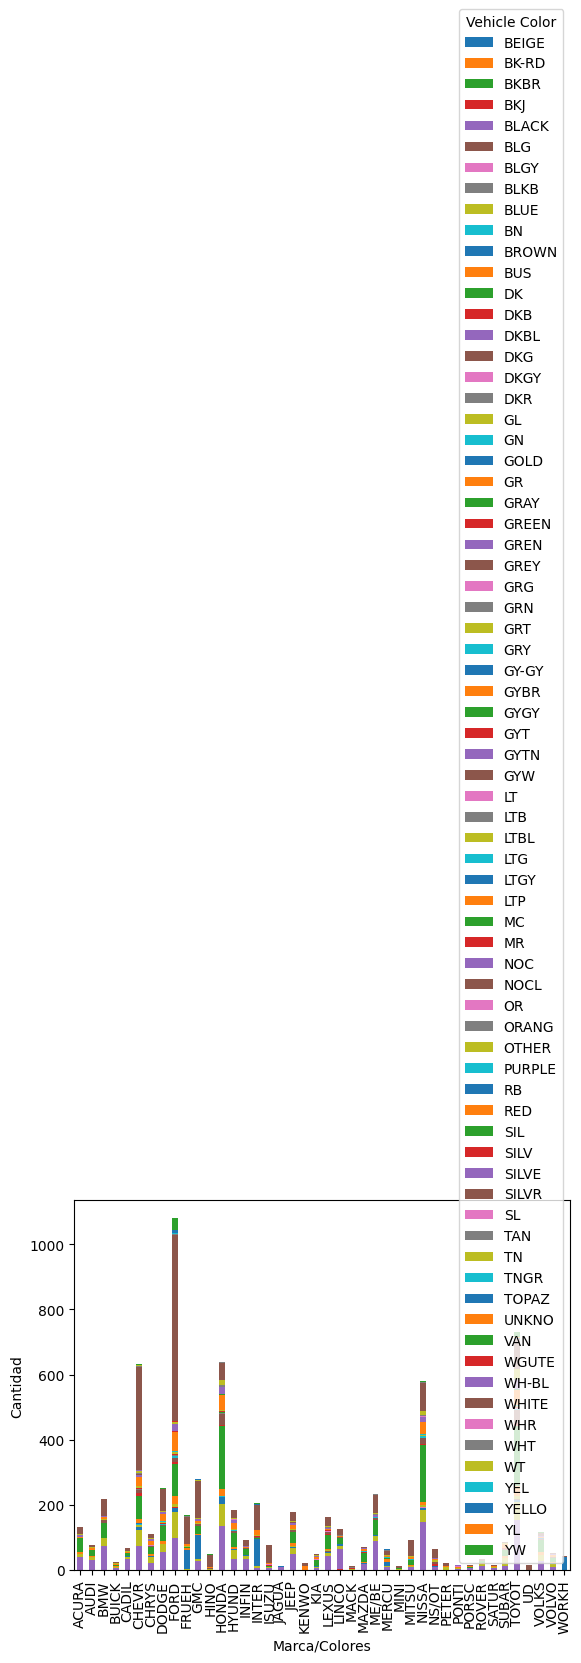

In [177]:
count_make_color = df_filtered_makes.groupby(['Vehicle Make', 'Vehicle Color']).size().unstack(fill_value=0)

count_make_color.plot(kind="bar",stacked=True,xlabel="Marca/Colores", ylabel="Cantidad")

plt.show()


### H) Subé este código a tu repositorio. Incluye un documento Readme.md Indicando tan solo: "H"

### I) Convierte la serie `Issue Date` en una serie temporal y contabiliza las multas por `Violation Code[] y més del Issue Date.

In [186]:
df_filtered_makes['Issue Date'] = pd.to_datetime(df_filtered_makes['Issue Date'])
df_filtered_makes['Month'] = df_filtered_makes['Issue Date'].dt.month
df_filtered_makes.groupby(['Month','Violation Code']).size().unstack(fill_value=0)

Violation Code,5,7,8,9,10,11,13,14,16,17,...,78,79,80,82,83,84,85,89,98,99
Month,,,,,,,,,,,,,,,,,,,,,
1,16,31,0,0,4,0,0,50,14,5,...,6,0,1,3,2,0,4,0,1,1
2,15,27,0,0,3,0,1,47,15,6,...,1,0,1,2,2,0,1,0,3,0
3,27,44,0,0,3,1,4,55,14,5,...,5,1,0,2,3,4,3,0,2,0
4,0,54,1,0,2,0,9,61,16,5,...,4,1,0,2,1,2,0,0,3,0
5,0,22,0,0,1,1,3,57,18,6,...,2,0,1,1,4,0,2,1,3,0
6,1,0,0,2,2,0,1,42,17,3,...,3,0,0,3,1,0,0,0,3,0
7,8,20,0,1,0,0,0,4,6,2,...,2,0,0,0,0,0,0,0,1,0
8,14,68,0,1,0,0,1,52,13,1,...,5,0,1,3,3,0,1,0,1,0
9,31,54,0,0,4,1,0,58,12,6,...,2,1,0,3,4,1,4,0,2,1


### J) Visualiza la anterior cuestión (I)

Se puede observar que independiente del mes hay dos tipos de infracción que destacan mas que las demas: 14, 7, 16 y luego hay algun mes cómo el mes de julio que el numero de infracciones baja.

### K) Subé este código a tu repositorio. Sustituye la 'H' del readme.md por un 'end'